# <center> Project Agros - Group 17

## Introduction

This notebook contains the work developed by our group during the two-day hackathon, in which we studied the agricultural output of several countries, hoping to contribute to a green transition. The agricultural data used is from Our World in Data and includes data on production output (crop, animal, fish), fertilizers, capital, labour used, among other factors. Our analysis and key findings can be found in this showcase notebook.

## First steps
 Lets start by importing our Class

In [1]:
from Class.project_agros import Agros

After importing we need to download the Datasets from "Our World in Data" and Natural Eath". **Our World in Data** is an online publication that provides information on the historical development of humanity's living conditions. It looks at demographic, developmental economic, geographical and cultural aspects, among others. **Natural Earth** webiste provides free vector and raster map data at various scales for the entire world, which can be used for mapping.

In [2]:
# Code to download data
agros = Agros()
agros.load_data()

Data file 'Agricultural_analysis.csv' already exists in 'downloads' directory.
Data file 'ne_110m_admin_0_countries.shp' already exists in 'downloads' directory.


Let's see the first rows of data of our datasets

In [3]:
print(agros.data.shape)
agros.data.head(3)

(10030, 23)


Entity  Year      tfp   output   inputs  ag_land_index  labor_index  \
0  Afghanistan  1961  65.0814  44.8285  68.8807        91.6812      44.5145   
1  Afghanistan  1962  64.0637  45.6182  71.2075        92.2016      45.0207   
2  Afghanistan  1963  61.6217  45.9729  74.6051        92.6352      45.5528   

   capital_index  materials_index  output_quantity  ...  ag_land_quantity  \
0       141.5215          35.9132          2566730  ...             10571   
1       163.6547          36.3829          2611942  ...             10631   
2       202.0577          37.0801          2632254  ...             10681   

   labor_quantity  capital_quantity  machinery_quantity  livestock_quantity  \
0            1704              8866                   5                6339   
1            1723             10253                   6                6228   
2            1743             12659                   8                6547   

   fertilizer_quantity  animal_feed_quantity  cropland_quantity  \
0                57345               2068912               7700   
1                58146               2082012               7760   
2                59694               2007829               7810   

   pasture_quantity  irrigation_quantity  
0             30000                 2380  
1             30000                 2380  
2             30000                 2380  

[3 rows x 23 columns]

In [15]:
print(agros.data_geo.shape)
agros.data_geo.head()

(177, 2)


ADMIN                                           geometry
0            Fiji  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1        Tanzania  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2  Western Sahara  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3          Canada  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4   United States  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

## Diving in

Let's compare the evolution of the countries regarding the fertalizer and the output quantity

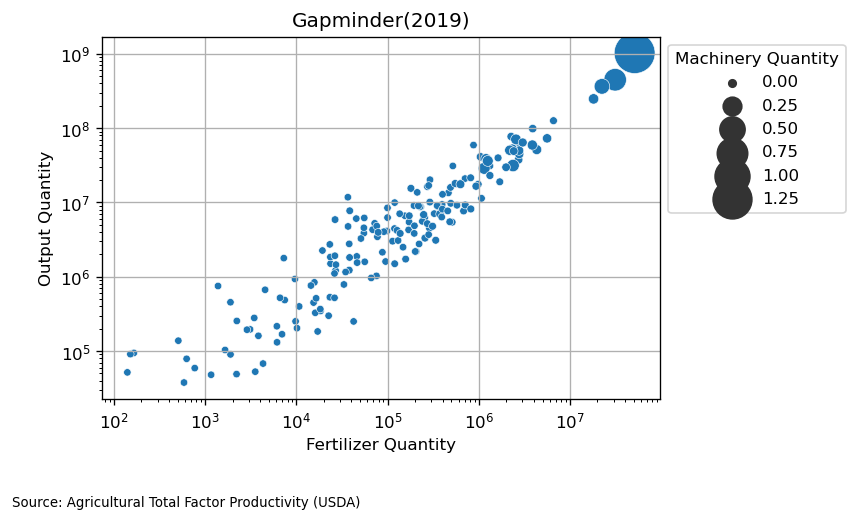

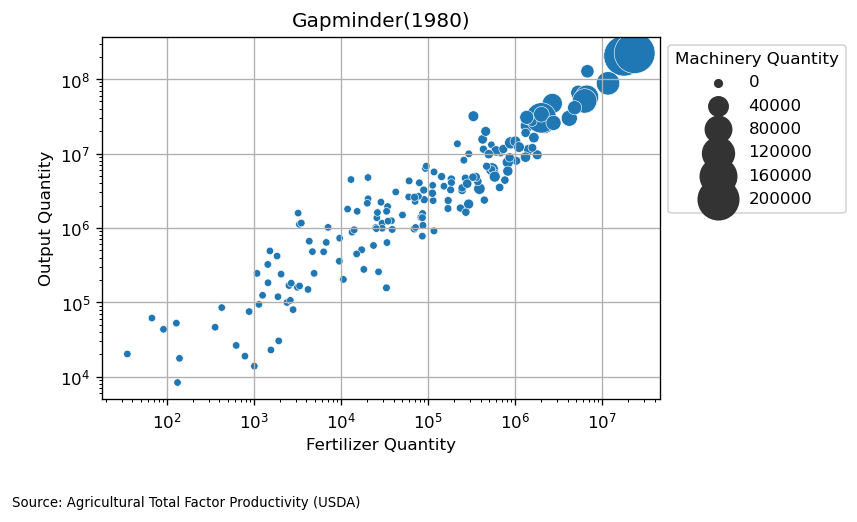

In [5]:
# Plot
agros.gapminder(2019,True,True)
agros.gapminder(1980,True,True)

Through exploratory analysis of the correlation between output and fertilizer quantities, we determined that the area of the circles in our chart should be represented by the relationship between output and machinery. While other variables had higher correlations, we chose machinery due to its broader scope, which may include animals, and fish in addition to crops.

In **2019**, we observed a strong positive correlation between output quantities and the application of fertilizers. This is expected, as fertilizers are intended to increase crop production while minimizing the use of labor and land resources. Moreover, we found a high correlation between the use of machinery and output quantities, suggesting that as the amount of fertilizers used increases, so does the amount of machinery employed, leading to higher output quantities.

In **1980** there where a lot more countries with similar ouput quantities using the same amount of fertilizer. 

It's important to note that the data we are comparing reflects countries with varying levels of agricultural power, and thus the results are not normalized. Therefore, we can observe that the wealthiest countries tend to have higher output quantities.

## Selecting the subjects

We have data from a vast selection of countries

In [6]:
print(agros.countries_list())
print(len(agros.countries_list()))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',

178 countries to be exact, from all the countries lets choose three from diferent continents

In [7]:
countries = ['Portugal', 'Mexico', 'China']

## How are they doing?

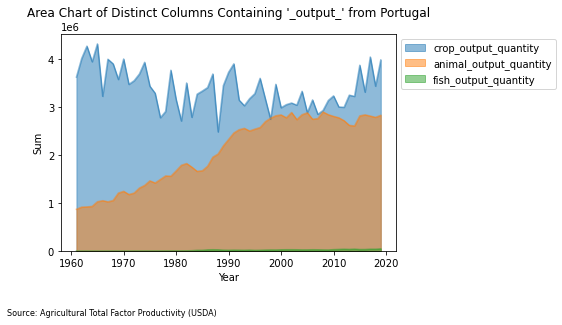

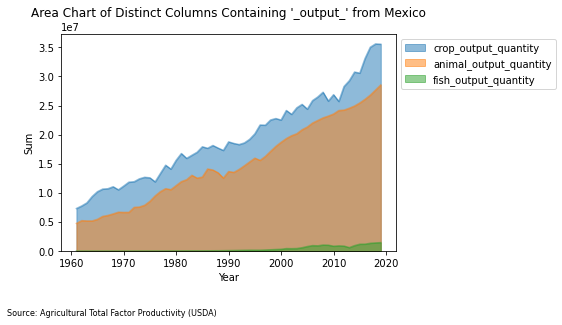

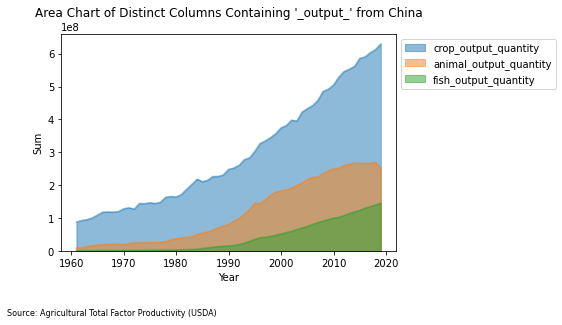

In [8]:
for country in countries:
    agros.plot_area_chart(country, False)  

**Portugal**: Portugal's crop output has remained relatively constant over the years, with a small downward trend in recent times. There are occasional spikes in the graph, possibly due to weather or economic factors. On the other hand, Portugal's animal_output surpasses that of all other countries in this analysis. It has been steadily increasing and surpassed crop output in the 1990s. The fish industry is much smaller than the other industries, experiencing growth after the 1980s, but still only a fraction of the size of the animal and crop industries.

**Mexico**: Mexico's crop industry has shown impressive growth, despite not having the vast resources of China. However, the growth has been marked by significant difficulties, as shown by the spikes in the output data over the years. Mexico's animal_output, is keeping company at a similar rate to the growth of the crop output. Interestingly, the fish output industry has only started to develop in the last two decades, with a small growth trend. Overall, Mexico has shown steady progress in its agricultural industries, despite the challenges faced.

**China**:  Looking at China's data, we can see a steady growth in all three output categories over the years. Crops_output occupies the largest portion of the graph, which is likely due to China's extensive and fertile land. Animal_output experienced consistent growth since the 1980s but shows a recent decline in the most recent years. On the other hand, fish_output has been constantly increasing since the 1980s. While it was the smallest industry at the beginning, it is now catching up to the animal industry. Overall, these trends suggest China's agriculture sector has been evolving towards a more diversified production system.

These trends are consistent with the general global trend in agriculture, where diversification is becoming increasingly important for sustainability and resilience. In the case of China, the decline in animal_output could be due to environmental concerns, such as water and air pollution, which have been major issues in the country. The growth of the fish_output industry could be seen as a response to these environmental concerns, as fish production is generally less resource-intensive and less polluting than animal production. Similarly, in the case of Portugal and Mexico, the growth of the animal_output industry could be seen as a reflection of changing consumer preferences and a growing demand for animal products globally. However, this growth also raises concerns about the environmental impact of animal production, and the need for sustainable practices in the sector. Overall, the trends observed in these three countries highlight the importance of balancing economic growth with environmental sustainability in the agriculture sector.


## A broader look

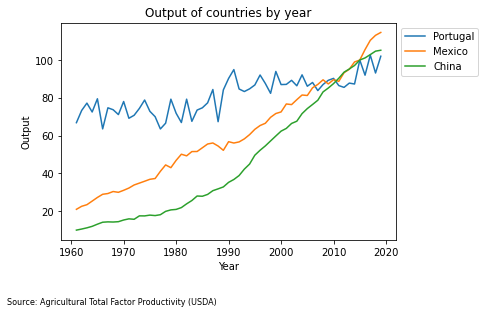

In [9]:
agros.display_output(countries)

Based on our analysis, it's evident that Portugal's agricultural output has experienced a slow growth over the last six decades, compared to Mexico and China. While Portugal's output has remained relatively steady, Mexico and China have shown exponential growth in their agricultural sectors, with Mexico's output even competing with China's. Despite China's vast resources, Mexico has managed to achieve higher output levels. In 2010, and the following years Mexico and China surpassed Portugal's output, with China close to Mexico's output but through the last few years Mexico suprassed China with a huge jump near 2014-2015, moreoverer their growth trend has continued since then.



## What correlates?

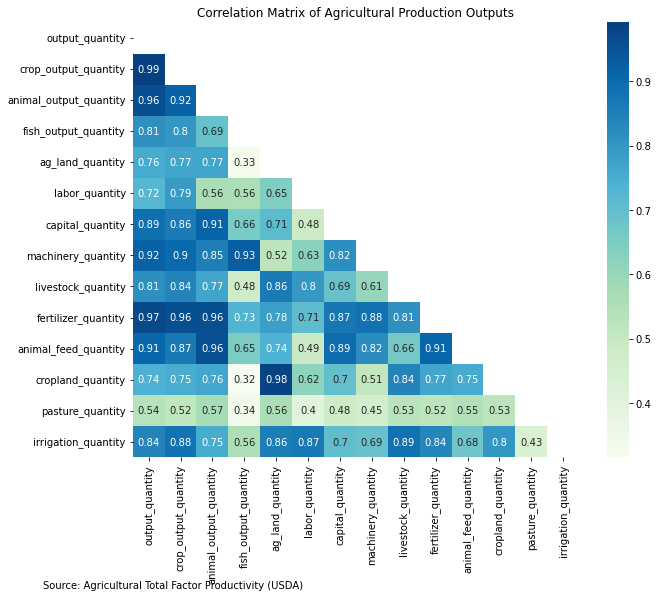

In [10]:
agros.correlation()

There seems to be a positive correlation between most of the variables in the table. For example, crop output quantity is highly correlated with output quantity (0.996), and fertilizer quantity is highly correlated with animal output quantity (0.982) and crop output quantity (0.968). However, there is a weaker positive correlation between fish output and other variables. Additionally, there are no negative values in the table.

## How's the world doing?

In [11]:
agros.choropleth(agros.data.Year.max())

In [12]:
agros.choropleth(2000)

Comparing both choropleths for the different years we can see a global increase in TFP in just two decades. Globally, TFP has increased in countries that had lagged behind. Some decades ago "third world" countries had the highest TFP rate and the ability to grow in contrast to more developed countries. In the past, this was true until more developed countries started paying attention to their agricultural industries. Today, the global average TFP appears to be closer to a hundred. 

## The prediction

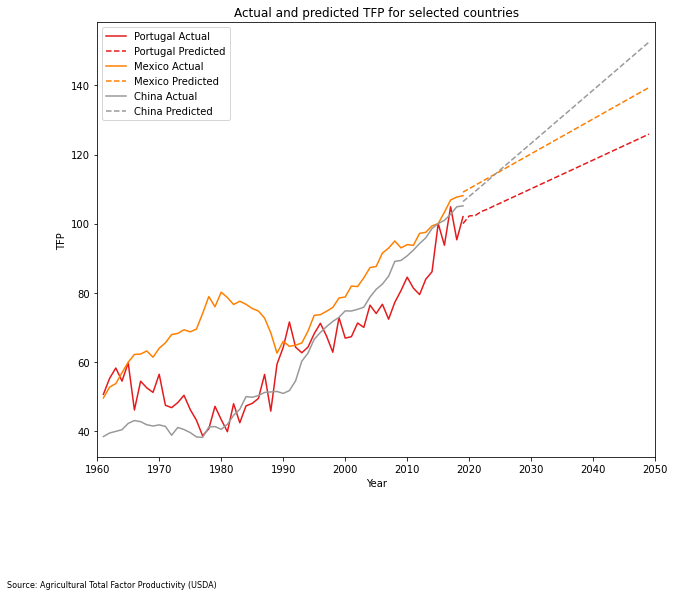

In [13]:
agros.predictor(countries)

Comparing the total factor productivity of our countries, we can see that for the first four decades, Portugal and Mexico had the biggest variations in TFP. In contrast, China had a low growth rate. In the midst of the new millennium, the three countries had similar TFP's with Portugal being the one with the most variation between years. However, the tree had consistent growth, as we can read from the data. In the last few years, Mexico surpassed China's TFP and Portugal presented the lowest TFP. The funny part, however, is the prediction until 2050, when China will continue with its tremendous growth surpassing Mexico in a matter of 4-5 years. Although every country has a projection to develop its TFP, China has the most accentuated slope, with Mexico in second place and Portugal in third. We can then assume all countries will have a growing TFP rate for the next 3 decades.

## Last comments
Through this project, we may infer some conclusions about the relation between input quantities and output quantities. There is a positive correlation between these based on the analysis of the correlation table. Generally speaking, more inputs (machinery, capital, labor) leads to more output quantity. The special case of fish outputs is probably due to the fact it is affected more by natural factors than other output variables. 
Overall, in the last four decades, some countries have been able to significantly increase their output with only minimal increases in fertilizer or machinery inputs."

We also noticed that Portugal consistently had high crop output, but its TFP rate was not the best until later years, making it an outlier in this sense. Additionally, it is not surprising to see lower TFP growth rates in more advanced economies, as they have already made significant gains in productivity. Nonetheless, Portugal's high crop output despite its lower TFP rate suggests that it may have been using more inputs than necessary to achieve its level of output compared to other countries with similar output levels.
While the world has generally increased its agricultural potential, it is pertinent to remember that agriculture is our main food source. In the event of a catastrophe or pandemic, each country must be able to provide its citizens with the necessary resources. However, it is also worth noting that globalization and trade have allowed increased access to food and resources from other countries. This can help mitigate the impact of local shortages or disasters.

## <center> The End